In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd output

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


Best worker's PR against BBG:  1.0 1.0
Joined PR: (0.993503915856242, 0.6081213577427901)


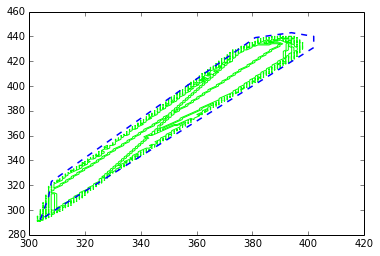

In [68]:
objid=12
worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
filter_idx = np.where((worker_recall_lst>=0)&(worker_recall_lst<=1)&(worker_precision_lst>=0)&(worker_precision_lst<=1))[0]
worker_precision_lst=worker_precision_lst[filter_idx]
worker_recall_lst=worker_recall_lst[filter_idx]
worker_ids=worker_ids[filter_idx]
#best recall based workers 
best_worker = list(set((np.argmax(worker_recall_lst),np.argmax(worker_precision_lst))))[0]
print "Best worker's PR against BBG: ", max(worker_recall_lst),max(worker_precision_lst)
os.chdir("..")
tiles,indicatorMat= createObjIndicatorMatrix(objid)
os.chdir(DATA_DIR)
approved_tiles = np.where(indicatorMat[best_worker]==1)[0]
for tidx in approved_tiles:
    plot_coords(Polygon(tiles[tidx]),color="lime")
my_BBG  = pd.read_csv("../../my_ground_truth.csv")
ground_truth_match = my_BBG[my_BBG.object_id==objid]
x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
plt.plot(x_locs,y_locs,'--',color='#0000ff',linewidth=1.5)
joined_bb = join_tiles(approved_tiles,tiles)
print "Joined PR:",compute_PR(objid,approved_tiles,tiles)

In [4]:
cd TileEM/output/

[Errno 2] No such file or directory: 'TileEM/output/'
/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [17]:
def PR_compare(objid):
    worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
    filter_idx = np.where((worker_recall_lst>=0)&(worker_recall_lst<=1)&(worker_precision_lst>=0)&(worker_precision_lst<=1))[0]
    worker_precision_lst=worker_precision_lst[filter_idx]
    worker_recall_lst=worker_recall_lst[filter_idx]
    worker_ids=worker_ids[filter_idx]
    #best recall based workers 
#     best_worker = list(set((np.argmax(worker_recall_lst),np.argmax(worker_precision_lst))))[0]
    best_worker =  np.argmax(worker_recall_lst)
    print "Best worker's PR against BBG: ", max(worker_precision_lst),max(worker_recall_lst)
    os.chdir("..")
    tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=True)
    os.chdir(DATA_DIR)
    approved_tiles = np.where(indicatorMat[best_worker]==1)[0]
    for tidx in approved_tiles:
        plot_coords(Polygon(tiles[tidx]),color="lime")
    
    bb_objects = bb_info[bb_info["object_id"]==objid]
    best_worker_id = worker_ids[best_worker]
    worker_bb_info = bb_objects[bb_objects["worker_id"]==best_worker_id]
    worker_BB_polygon = Polygon(zip(*process_raw_locs([worker_bb_info["x_locs"].values[0],worker_bb_info["y_locs"].values[0]])))#.buffer(0)

    plot_coords(worker_BB_polygon,color='#0000ff',reverse_xy=True)
    
    joined_bb = join_tiles(approved_tiles,tiles)
    joined_p, joined_r = compute_PR(objid,approved_tiles,tiles)
    print "Joined PR:",joined_p, joined_r
    diff_r = max(worker_recall_lst)-joined_r
    diff_p = max(worker_precision_lst)-joined_p
    print "Difference: ", diff_p,diff_r
    return diff_p,diff_r

In [18]:
import mpld3
mpld3.enable_notebook()

In [19]:
cd TileEM/output/

[Errno 2] No such file or directory: 'TileEM/output/'
/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [15]:
mpld3.disable_notebook()

  0%|          | 0/47 [00:00<?, ?it/s]

Best worker's PR against BBG:  0.944169228157 0.992825993557
Number of non-overlapping tile regions (M) :  4282
Number of workers (N) :  40
all unvoted tiles: [  4   5   6   7   8   9  11  12  13  14  15  20  23  25  26  29  30  31
  32  39  40  41  44  45  46  48  53  55  57  60  61  62  64  68  69  71
  73  74  75  76  77  78  79  80  81  97 108 119 121 171 179 180 182 193
 215 228 230 232]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  1
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

  2%|▏         | 1/47 [00:51<39:27,  0.02it/s]

 0.193336813057 0.861200329325
Difference:  0.750832415101 0.131625664233
Best worker's PR against BBG:  0.977930266743 1.0
Number of non-overlapping tile regions (M) :  1473
Number of workers (N) :  40
all unvoted tiles: [  1   2   4   5   6   9  11  12  13  14  16  17  18  19  20  21  22  23
  25  26  27  29  30  31  32  34  35  36  37  38  39  42  43  44  46  47
  48  49  51  52  56  60  66  72  73  75  79  80  81  86  88  89  94 108
 122 148 157 255]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  2
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

  4%|▍         | 2/47 [01:08<25:36,  0.03it/s]

 0.894506212858 0.852552313975
Difference:  0.0834240538843 0.147447686025
Best worker's PR against BBG:  0.990248040059 0.94648436312
Number of non-overlapping tile regions (M) :  850
Number of workers (N) :  40
all unvoted tiles: [  1   2   3   4   5   7   8   9  10  13  14  17  18  19  21  22  23  27
  29  31  32  34  36  37  38  52  53  55  56  57  63  70  75  79  96 100
 101 102 109 135 139 172]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  3
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

  6%|▋         | 3/47 [01:16<18:37,  0.04it/s]

 0.990990184845 0.733308503905
Difference:  -0.000742144786831 0.213175859215
Best worker's PR against BBG:  0.981390012593 0.983619260089
Number of non-overlapping tile regions (M) :  1137
Number of workers (N) :  40
all unvoted tiles: [  0   3   4   6   7   8   9  12  13  14  16  17  18  19  20  22  23  24
  27  28  30  31  32  33  34  35  37  38  41  42  43  46  47  48  49  50
  52  53  54  55  57  59  60  61  65  70  75  78  83  89  90  94  96 107
 113 123 161 163 229]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  4
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

  9%|▊         | 4/47 [01:28<15:50,  0.05it/s]

 0.988802540733 0.757017243582
Difference:  -0.00741252813915 0.226602016507
Best worker's PR against BBG:  0.990837224185 0.950324076004
Number of non-overlapping tile regions (M) :  1459
Number of workers (N) :  40
all unvoted tiles: [  3   4   6   8   9  11  13  14  15  16  20  21  25  28  29  30  33  36
  37  39  41  42  43  45  46  47  48  50  59  62  67  83  94  96  99 128
 224]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  5
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 11%|█         | 5/47 [01:43<14:25,  0.05it/s]

 0.960365892602 0.615720774938
Difference:  0.0304713315821 0.334603301066
Best worker's PR against BBG:  0.996977818327 1.0
Number of non-overlapping tile regions (M) :  426
Number of workers (N) :  40
all unvoted tiles: [ 5  6  8 11 12 13 14 15 17 18 28 33 34 39 40 60]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  6
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 13%|█▎        | 6/47 [01:47<12:12,  0.06it/s]

 0.98748559928 0.474885208601
Difference:  0.00949221904742 0.525114791399
Best worker's PR against BBG:  0.942381337373 0.974135869084
Number of non-overlapping tile regions (M) :  1294
Number of workers (N) :  40
all unvoted tiles: [ 10  11  16  17  22  27  29  57  59  62  68 117 120 173 228]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  7
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 15%|█▍        | 7/47 [01:57<11:10,  0.06it/s]

 0.969857362597 0.437104910272
Difference:  -0.0274760252241 0.537030958812
Best worker's PR against BBG:  0.965834097823 0.989920558258
Number of non-overlapping tile regions (M) :  6807
Number of workers (N) :  42
all unvoted tiles: [  2   3   4   5   6   7   8   9  10  12  13  14  17  18  20  21  22  24
  25  27  28  29  31  33  36  37  41  42  43  45  48  49  50  51  52  56
  57  58  59  61  66  67  68  69  70  71  72  73  74  76  77  81  82  83
  84  86  87  88  91  92  94  95  96  98  99 100 101 103 104 105 106 107
 108 109 111 112 115 116 117 119 120 121 123 124 127 128 129 130 131 132
 133 134 136 137 143 154 157 161 171 178 184 200 203 204 205 206 209 211
 234 240 241 243 245 246 248 253 254 255 267 277 302 303 307 308 316 318
 319 324 393 408 417 429 431 433 481 499 500 501 684 898]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  8
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zer

 17%|█▋        | 8/47 [03:22<16:27,  0.04it/s]

 0.651672534742 0.794194384423
Difference:  0.314161563081 0.195726173836
Best worker's PR against BBG:  0.999002583262 0.974452641021
Number of non-overlapping tile regions (M) :  1607
Number of workers (N) :  42
all unvoted tiles: [  1   2   3   4   5   6   7   8   9  10  11  13  14  15  17  18  21  22
  25  29  32  33  34  42  43  44  46  48  52  55  56  65  66  67  68  69
  70  74  99 106 116 119 121 123 137 162 182 183 184 185 262]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  9
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 19%|█▉        | 9/47 [03:43<15:42,  0.04it/s]

 0.995479985187 0.821228778909
Difference:  0.0035225980741 0.153223862112
Best worker's PR against BBG:  1.0 1.0
Number of non-overlapping tile regions (M) :  2526
Number of workers (N) :  44
all unvoted tiles: [  4   6   7   8   9  10  14  15  17  21  22  26  27  28  29  30  31  33
  34  36  49  67  69 117]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  10
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 21%|██▏       | 10/47 [04:06<15:12,  0.04it/s]

 0.70266062905 0.885730176222
Difference:  0.29733937095 0.114269823778
Best worker's PR against BBG:  0.952480721867 0.974806457062
Number of non-overlapping tile regions (M) :  1368
Number of workers (N) :  42
all unvoted tiles: [  0   1   4   5   7   8   9  10  11  12  13  14  16  17  21  22  23  24
  25  29  30  35  36  39  40  41  44  45  47  49  58  68 113 118 119 124
 126 127 132 135 139 176]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  11
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 23%|██▎       | 11/47 [04:20<14:12,  0.04it/s]

 0.97771064748 0.512269690392
Difference:  -0.0252299256126 0.462536766669
Best worker's PR against BBG:  1.0 1.0
Number of non-overlapping tile regions (M) :  1971
Number of workers (N) :  44
all unvoted tiles: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  18  19
  20  21  22  23  24  25  27  30  32  33  34  35  36  37  38  39  40  41
  42  44  45  51  53  54  59  61  63  64  65  66  67  69  72  73  74  75
  77  78  79  80  82  87  88  89  91  92  94  95  97  99 102 105 106 110
 118 126 127 138 197 202 213 217 224 225 226 231 234 235 237 321 322 323
 327 328 331 334 369 393]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  12
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 26%|██▌       | 12/47 [04:42<13:44,  0.04it/s]

 0.993503915856 0.608121357743
Difference:  0.00649608414376 0.391878642257
Best worker's PR against BBG:  0.990987676546 0.996616520038
Number of non-overlapping tile regions (M) :  2331
Number of workers (N) :  40
all unvoted tiles: [  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  18  21  23
  24  25  26  27  28  29  32  33  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  53  54  55  57  58  60  61  63  64  66  70
  71  72  73  74  77  78  79  80  81  82  83  84  86  89  90  92  93  95
 100 101 104 105 106 109 110 112 119 120 140 146 147 152 156 157 158 162
 163 164 167 218 255 261 336 337 492]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  13
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 28%|██▊       | 13/47 [05:06<13:21,  0.04it/s]

 0.994029687083 0.847664340039
Difference:  -0.00304201053643 0.148952179999
Best worker's PR against BBG:  0.978483309871 0.999429953951
Number of non-overlapping tile regions (M) :  4133
Number of workers (N) :  41
all unvoted tiles: [  2   3   6   7   8  11  13  15  16  18  19  25  36  38  41  42  43  44
  49  97 123 128]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  14
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 30%|██▉       | 14/47 [05:50<13:45,  0.04it/s]

 0.972018696149 0.87672635321
Difference:  0.00646461372194 0.122703600742
Best worker's PR against BBG:  0.942954516257 1.0
Number of non-overlapping tile regions (M) :  474
Number of workers (N) :  42
all unvoted tiles: [ 2  3  7  8  9 12 13 16 17 18 19 20 21 26 28 30 31 32 33 34 35 37 40 42 43
 44 49 64 83]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  15
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 32%|███▏      | 15/47 [05:55<12:38,  0.04it/s]

 0.970090031541 0.524754455715
Difference:  -0.0271355152835 0.475245544285
Best worker's PR against BBG:  0.996257177416 0.99733704391
Number of non-overlapping tile regions (M) :  1080
Number of workers (N) :  40
all unvoted tiles: [  1   2   4   8  12  13  14  16  18  20  21  23  27  29  37  44  63  65
  69  86 111 115 116 119 129]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  16
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 34%|███▍      | 16/47 [06:06<11:50,  0.04it/s]

 0.975998731327 0.804970555488
Difference:  0.0202584460893 0.192366488423
Best worker's PR against BBG:  0.946851384528 1.0
Number of non-overlapping tile regions (M) :  1259
Number of workers (N) :  46
all unvoted tiles: []
all unvoted workers: []
Object  17
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 36%|███▌      | 17/47 [06:19<11:10,  0.04it/s]

 0.980949331117 0.704262411092
Difference:  -0.0340979465893 0.295737588908
Best worker's PR against BBG:  1.0 0.994172162696
Number of non-overlapping tile regions (M) :  1483
Number of workers (N) :  40
all unvoted tiles: [  1   2   4   5   6   7   8   9  10  12  13  14  18  23  26  27  28  29
  30  32  33  34  35  36  37  39  40  41  43  45  46  48  51  52  54  58
  85  98 104 105 108 135 155 161 194]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  18
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 38%|███▊      | 18/47 [06:32<10:32,  0.05it/s]

 0.996479291797 0.843871391153
Difference:  0.00352070820269 0.150300771543
Best worker's PR against BBG:  0.994673490937 1.0
Number of non-overlapping tile regions (M) :  920
Number of workers (N) :  41
all unvoted tiles: [ 6  7 31]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  19
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 40%|████      | 19/47 [06:38<09:47,  0.05it/s]

 0.993863710524 0.732380039161
Difference:  0.000809780413399 0.267619960839
Best worker's PR against BBG:  1.0 0.994044228099
Number of non-overlapping tile regions (M) :  1408
Number of workers (N) :  40
all unvoted tiles: [  2   3   6   8   9  10  13  14  16  18  20  22  24  29  33  35  37  39
  46  48  52  53  54  60  63  66  83 101 104 111]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  20
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 43%|████▎     | 20/47 [06:52<09:16,  0.05it/s]

 0.884897604083 0.836057308229
Difference:  0.115102395917 0.157986919871
Best worker's PR against BBG:  1.0 0.99929973859
Number of non-overlapping tile regions (M) :  413
Number of workers (N) :  40
all unvoted tiles: [ 3  4  5  6  7 10 12 19 21 22 23 27 28 29 39 43 60 66]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  21
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 45%|████▍     | 21/47 [06:55<08:34,  0.05it/s]

 0.990964980196 0.754094164994
Difference:  0.00903501980426 0.245205573596
Best worker's PR against BBG:  1.0 0.999819620027
Number of non-overlapping tile regions (M) :  443
Number of workers (N) :  40
all unvoted tiles: [ 1  2  3  4  6  8  9 10 11 12 13 14 15 16 17 23 27 28 29 30 31 34 35 36 37
 38 40 42 44 46 63 74]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  22
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 47%|████▋     | 22/47 [06:59<07:57,  0.05it/s]

 0.930377546841 0.780346362232
Difference:  0.069622453159 0.219473257795
Best worker's PR against BBG:  0.988432832752 0.996494793856
Number of non-overlapping tile regions (M) :  3048
Number of workers (N) :  40
all unvoted tiles: [  2   3   5  10  11  12  15  16  17  19  20  21  22  23  24  25  26  27
  28  30  35  36  37  40  41  42  45  46  47  50  52  53  54  55  56  57
  59  61  62  63  65  66  67  69  70  72  76  77  79  80  81  82  84  85
  86  87  88  89  92  94  95 104 116 135 149 156 176 178 180 187 192 203
 206 207 208 209 210 213 240 246 294 331 354]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  23
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 49%|████▉     | 23/47 [07:29<07:48,  0.05it/s]

 0.991857662193 0.848326525357
Difference:  -0.00342482944077 0.148168268499
Best worker's PR against BBG:  0.997938526121 0.997969244052
Number of non-overlapping tile regions (M) :  1556
Number of workers (N) :  40
all unvoted tiles: [  1   3   5   6   9  10  11  12  13  14  15  16  18  19  21  22  27  28
  30  31  32  33  35  36  41  44  46  48  50  51  52  55  63  92  96  97
  98 171 247 318 377]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  24
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 51%|█████     | 24/47 [07:42<07:23,  0.05it/s]

 0.996324809015 0.846190992018
Difference:  0.00161371710594 0.151778252034
Best worker's PR against BBG:  0.998893855695 0.988457154451
Number of non-overlapping tile regions (M) :  9099
Number of workers (N) :  40
all unvoted tiles: [   2    9   10   13   14   15   16   17   18   19   20   21   22   24   31
   32   33   37   39   40   41   42   43   44   46   47   48   57   58   59
   60   61   66   69   70   71   73   75   77   83   85   86   87   89   91
   92   93   94   95   96   97   98   99  100  101  102  103  106  107  110
  111  112  113  114  115  117  119  122  126  127  128  129  130  131  132
  133  134  136  137  138  139  160  162  174  177  179  180  217  231  267
  269  271  273  298  320  323  324  344  397  403  404  643  697  720  765
 1016]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  25
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix

 53%|█████▎    | 25/47 [08:56<07:52,  0.05it/s]

 0.98965067311 0.810420052008
Difference:  0.00924318258498 0.178037102443
Best worker's PR against BBG:  0.991131807377 0.991915999043
Number of non-overlapping tile regions (M) :  3274
Number of workers (N) :  40
all unvoted tiles: [  3   4   5   6   8   9  10  11  12  13  14  16  17  19  20  21  22  24
  27  28  29  30  31  32  33  35  36  43  49  64  66  67  68  80  81  82
 101 147 169 170 171 181]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  26
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 55%|█████▌    | 26/47 [09:29<07:40,  0.05it/s]

 0.980492832242 0.856000989709
Difference:  0.010638975135 0.135915009334
Best worker's PR against BBG:  0.991800266633 0.999469612716
Number of non-overlapping tile regions (M) :  1147
Number of workers (N) :  40
all unvoted tiles: [ 1  3  4  5  6  8  9 13 14 15 16 17 22 23 24 25 26 27 28 29 30 31 34 38 40
 56 65 68 88]
all unvoted workers: []
After overlap adding

 57%|█████▋    | 27/47 [09:38<07:08,  0.05it/s]


all unvoted tiles: []
all unvoted workers: []
Object  27
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR: 0.0 0.0
Difference:  0.991800266633 0.999469612716
Best worker's PR against BBG:  0.953792059371 0.997547752406
Number of non-overlapping tile regions (M) :  5222
Number of workers (N) :  40
all unvoted tiles: [  2   4   7   8   9  16  19  22  27  28  29  30  31  32  33  34  36  37
  38  39  40  41  42  43  44  45  46  48  49  50  51  52  54  56  57  58
  59  60  61  62  63  64  65  66  67  71  72  73  74  75  80  81  82  83
  86  87  88  93 125 140 154 169 176 177 185 191 192 194 206 209 210 211
 212 247]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  28
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 60%|█████▉    | 28/47 [11:51<08:02,  0.04it/s]

 0.725374453606 0.644240947065
Difference:  0.228417605766 0.353306805341
Best worker's PR against BBG:  0.978628380736 1.0
Number of non-overlapping tile regions (M) :  3630
Number of workers (N) :  40
all unvoted tiles: [  2   3   7   8   9  10  12  14  15  16  18  21  22  24  27  28  30  31
  32  33  36  37  44  46  47  48  49  50  53  54  56  58  61  62  65  66
  67  68  82  84 144 237 245]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  29
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 62%|██████▏   | 29/47 [12:28<07:44,  0.04it/s]

 0.852935823819 0.764882456701
Difference:  0.125692556917 0.235117543299
Best worker's PR against BBG:  0.871789903112 1.0
Number of non-overlapping tile regions (M) :  3157
Number of workers (N) :  40
all unvoted tiles: [  1   7   9  10  12  13  14  15  17  21  24  28  29  34  36  38  39  40
  41  43  44  49  50  52  53  55  56  58  61  62  64  66  69  71  75  76
  77  79  80  81  89  91  94  97 100 101 103 105 108 109 110 112 116 117
 119 120 123 125 127 134 135 138 141 147 152 202 260]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  30
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 64%|██████▍   | 30/47 [13:00<07:22,  0.04it/s]

 0.917333573544 0.679361389419
Difference:  -0.0455436704319 0.320638610581
Best worker's PR against BBG:  0.980299993322 0.995706743051
Number of non-overlapping tile regions (M) :  3034
Number of workers (N) :  40
all unvoted tiles: [  0   2  15  21  24  25  27  28  29  30  32  33  34  35  36  37  38  41
  44  48  49  51  52  53  54  56  57  59  60  63  64  65  67  68  69 130
 149 150 152 177 182 200 206 305 328 336 338 373 378 490 519]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  31
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 66%|██████▌   | 31/47 [13:26<06:56,  0.04it/s]

 0.990705592102 0.905366278414
Difference:  -0.0104055987802 0.0903404646364
Best worker's PR against BBG:  0.995941869537 1.0
Number of non-overlapping tile regions (M) :  4274
Number of workers (N) :  40
all unvoted tiles: [  1   2   5   6  10  11  12  17  20  21  23  25  28  30  32  33  37  39
  95 108 137 480]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  32
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 68%|██████▊   | 32/47 [14:01<06:34,  0.04it/s]

 0.911950664316 0.904419924525
Difference:  0.0839912052203 0.095580075475
Best worker's PR against BBG:  0.97926068494 0.99845793278
Number of non-overlapping tile regions (M) :  4509
Number of workers (N) :  40
all unvoted tiles: [   1    7    9   13   15   17   19   21   25   26   27   28   30   31   32
   33   34   35   36   37   38   39   40   41   42   43   44   45   46   49
   51   52   54   55   56   58   59   61   69   71   72   73   74   75   77
   79   80   81   82   83   84   85   86   87   89   90   91   92   95   97
   98   99  101  102  103  105  107  111  112  113  115  116  117  118  123
  126  128  129  130  131  132  133  134  135  138  140  152  169  228  233
  236  248  250  252  254  280  290  291  292  296  347  354  358  359  380
  392  459  514  590  592  739  803  814  817  818 1027]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  33
Check that there are no all-zero rows in indicator matrix: True
Check that th

 70%|███████   | 33/47 [14:50<06:17,  0.04it/s]

 0.956719323379 0.942658763687
Difference:  0.0225413615609 0.0557991690931
Best worker's PR against BBG:  0.993635293917 0.98528563317
Number of non-overlapping tile regions (M) :  6479
Number of workers (N) :  40
all unvoted tiles: [  5   6   9  12  14  15  16  18  20  21  22  23  24  25  27  31  32  33
  34  37  38  41  42  45  46  47  48  49  51  53  56  57  58  59  60  62
  63  69  70  73  74  75  78  81  82  83  84  85  86  87  90  91  98 100
 101 103 104 107 109 111 116 117 121 122 125 130 131 133 134 136 137 141
 142 177 185 186 187 202 242 243 253 267 268 272 336 413 763]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  34
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 72%|███████▏  | 34/47 [16:01<06:07,  0.04it/s]

 0.998328528087 0.834499335392
Difference:  -0.00469323416944 0.150786297778
Best worker's PR against BBG:  0.904921900199 1.0
Number of non-overlapping tile regions (M) :  7827
Number of workers (N) :  40
all unvoted tiles: [   1    2    6    9   10   11   12   13   15   19   21   22   24   25   26
   27   28   29   32   34   35   37   38   39   40   42   43   44   45   47
   50   57   59   60   62   63   64   65   66   67   68   70   73   74   76
   77   79   81   84   85   87   89   92   93   94   95   96   99  100  107
  108  114  115  116  117  118  119  140  144  147  151  156  157  158  160
  167  194  198  202  206  258  286  289  290  291  373  508  510  822  826
 1121 1413 1709]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  35
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 74%|███████▍  | 35/47 [17:04<05:51,  0.03it/s]

 0.796616626773 0.944494846921
Difference:  0.108305273426 0.0555051530791
Best worker's PR against BBG:  0.997405428439 0.967924529193
Number of non-overlapping tile regions (M) :  6194
Number of workers (N) :  40
all unvoted tiles: [   0    2    3    6    7    8    9   10   11   12   13   14   15   16   17
   18   19   20   21   22   23   24   25   26   27   28   30   31   38   41
   42   43   44   45   46   47   48   50   51   52   53   54   55   56   57
   58   59   60   61   63   64   65   66   67   69   70   72   73   74   75
   76   77   78   79   81   83   84   85   86   88   90   91   94   97   98
   99  101  102  103  104  107  108  111  112  114  115  116  117  118  119
  121  122  123  125  126  127  128  130  131  132  133  135  136  137  138
  139  140  141  142  143  144  145  146  147  148  150  151  152  153  155
  156  157  158  159  160  161  162  164  165  166  167  168  170  171  172
  173  174  175  176  177  178  179  180  181  182  184  186  189  191  192
  194 

 77%|███████▋  | 36/47 [18:14<05:34,  0.03it/s]

 0.99457141169 0.802145604563
Difference:  0.00283401674899 0.16577892463
Best worker's PR against BBG:  0.992799264302 0.99173157459
Number of non-overlapping tile regions (M) :  2687
Number of workers (N) :  40
all unvoted tiles: [  0   1   2   3   4   5   6   7   9  10  13  14  16  20  21  23  25  28
  29  31  32  33  35  36  38  40  41  43  44  46  50  52  54  55  56  57
  60  61  66  67  69  70  71  73  75  76  77  81  83  90  99 109 119 152
 160 169 213 232 280 323]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  37
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 79%|███████▊  | 37/47 [18:40<05:02,  0.03it/s]

 0.989997643952 0.615541756447
Difference:  0.00280162035084 0.376189818142
Best worker's PR against BBG:  0.993023019738 0.991170637715
Number of non-overlapping tile regions (M) :  2329
Number of workers (N) :  40
all unvoted tiles: [  0   2   3   6   7   9  11  12  15  16  17  19  20  22  23  25  27  29
  31  32  34  35  37  39  40  41  44  47  49  51  54  55  56  57  58  59
  60  68  69  82 109 111 113 114 117 118 120 122 126 128 129 131 132 134
 135 141 142 164 192 195 196 199 200 209 212 268]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  38
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 81%|████████  | 38/47 [19:00<04:30,  0.03it/s]

 0.996372249108 0.909046871428
Difference:  -0.00334922936966 0.0821237662871
Best worker's PR against BBG:  0.992787061632 0.995329003269
Number of non-overlapping tile regions (M) :  3029
Number of workers (N) :  40
all unvoted tiles: [  3   6   7   8   9  10  12  17  22  25  26  27  28  29  31  32  33  35
  39  41  43  46  47  49  50  51  52  56  57  58  59  64  70  94  95  96
  98  99 115 116 121 122 123 124 132 133 201 211 279 280 308 313 361 362
 363 389 426 492]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  39
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 83%|████████▎ | 39/47 [19:26<03:59,  0.03it/s]

 0.996953988774 0.945822647343
Difference:  -0.00416692714186 0.0495063559259
Best worker's PR against BBG:  0.969951783684 1.0
Number of non-overlapping tile regions (M) :  1324
Number of workers (N) :  40
all unvoted tiles: [ 4  5  6  7  9 10 11 12 13 15 16 17 18 19 22 24 25 27 32 33 36 38 45 47 48
 50 57 58 61 63 64 84]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  40
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 85%|████████▌ | 40/47 [19:34<03:25,  0.03it/s]

 0.0206904026471 1.0
Difference:  0.949261381037 0.0
Best worker's PR against BBG:  0.938146640755 1.0
Number of non-overlapping tile regions (M) :  2199
Number of workers (N) :  40
all unvoted tiles: [  2   3   4   9  13  14  15  18  19  21  23  25  26  27  28  33  38  40
  41  42  43  44  45  46  48  50  51  52  55  58  59  61  63  65  66  67
  68  70  77  81  83  85  87  91  94  95  96  97  99 100 101 103 104 105
 106 107 108 110 111 113 116 117 119 121 153 154 155 162 181 185 197 198
 204 208 241 244 245 249 251 264 273 276 281 287 388 444 448 474 486 574
 658]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  41
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 87%|████████▋ | 41/47 [19:48<02:53,  0.03it/s]

 0.87641718488 0.568282223567
Difference:  0.0617294558751 0.431717776433
Best worker's PR against BBG:  1.0 0.928517279158
Number of non-overlapping tile regions (M) :  1686
Number of workers (N) :  40
all unvoted tiles: [  2   3   4   6   8  11  12  14  15  16  17  20  24  25  27  28  29  30
  33  34  36  37  38  40  41  42  43  44  45  46  81  84  85  91  98 100
 101 102 103 105 113 117 201 268]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  42
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 89%|████████▉ | 42/47 [19:58<02:22,  0.04it/s]

 1.0 0.0487210948561
Difference:  0.0 0.879796184302
Best worker's PR against BBG:  0.990731860966 0.955524897277
Number of non-overlapping tile regions (M) :  2725
Number of workers (N) :  40
all unvoted tiles: [  2   9  13  16  18  19  22  23  24  25  27  32  33  34  35  36  37  38
  39  40  43  44  47  49  50  51  53 101 103 107 109 110 111 112 113 123
 127 129 133 135 136 137 171 176 188 211 216 507 664 665 745]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  43
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 91%|█████████▏| 43/47 [20:22<01:53,  0.04it/s]

 0.994681498137 0.831592608921
Difference:  -0.00394963717089 0.123932288355
Best worker's PR against BBG:  0.967303420486 0.979651135897
Number of non-overlapping tile regions (M) :  2765
Number of workers (N) :  40
all unvoted tiles: [  1   2   4   6   7   9  10  11  13  14  15  16  17  19  20  25  26  27
  28  29  30  31  32  36  38  39  40  41  42  43  44  45  48  49  50  51
  52  54  56  59  61  63  64  67  69  70  71  72  89  97 106 108 120 124
 125 126 135 137 140 144 148 150 167 171 186 187 191 211 214 373]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  44
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 94%|█████████▎| 44/47 [20:51<01:25,  0.04it/s]

 0.985789646146 0.814738748242
Difference:  -0.0184862256605 0.164912387655
Best worker's PR against BBG:  0.999828254118 0.974801026442
Number of non-overlapping tile regions (M) :  809
Number of workers (N) :  40
all unvoted tiles: [  2   3   5   6   7   8  31  40  64  70  72  75 108]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  45
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 96%|█████████▌| 45/47 [20:57<00:55,  0.04it/s]

 0.866045124956 0.690243327671
Difference:  0.133783129163 0.284557698771
Best worker's PR against BBG:  0.973335085088 0.993678445979
Number of non-overlapping tile regions (M) :  2149
Number of workers (N) :  40
all unvoted tiles: [  1   3   5   6   7   8   9  14  15  16  18  19  20  21  23  25  26  28
  29  32  35  36  37  38  41  48  49  53  59  60  78  83  91  92  96  99
 124 134 174 182 185 211 225 279]
all unvoted workers: []
After overlap adding
all unvoted tiles: []
all unvoted workers: []
Object  46
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR:

 98%|█████████▊| 46/47 [21:14<00:27,  0.04it/s]

 0.992591781132 0.76747685714
Difference:  -0.019256696044 0.226201588838
Best worker's PR against BBG:  0.992956869208 0.99524974385
Number of non-overlapping tile regions (M) :  666
Number of workers (N) :  40
all unvoted tiles: [ 1  4 12 14 15 76]
all unvoted workers: []
After overlap adding


all unvoted tiles: []
all unvoted workers: []
Object  47
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Joined PR: 0.0 0.0
Difference:  0.992956869208 0.99524974385


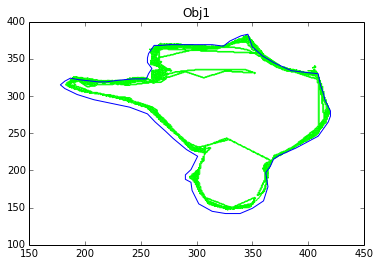

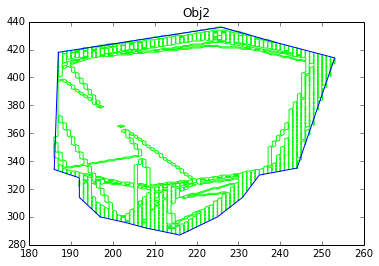

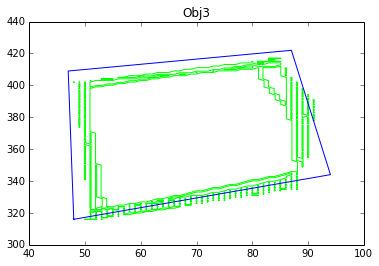

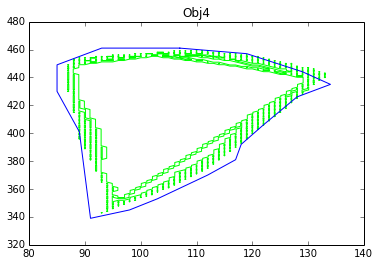

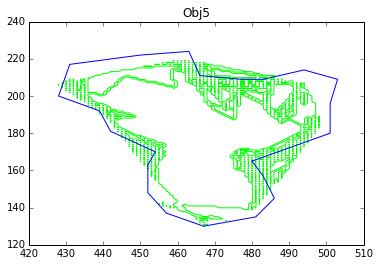

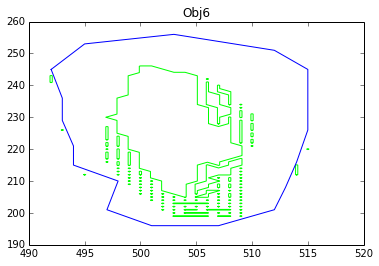

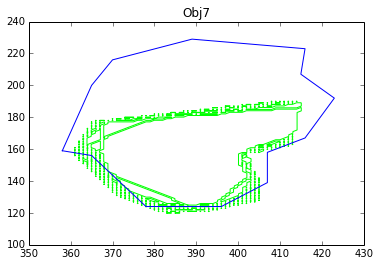

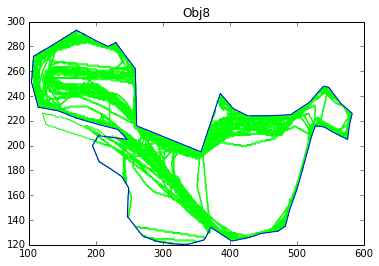

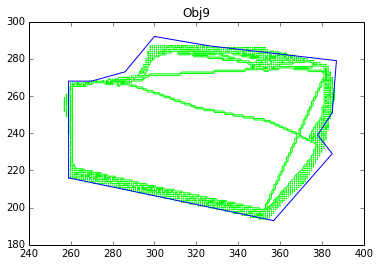

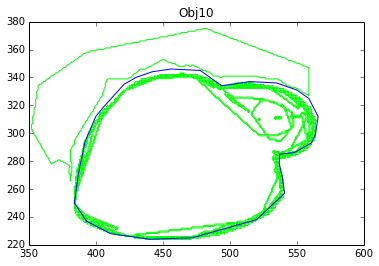

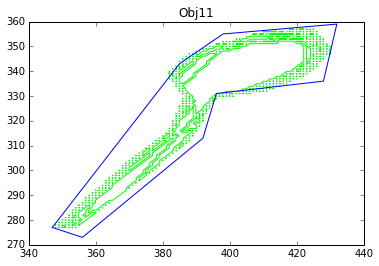

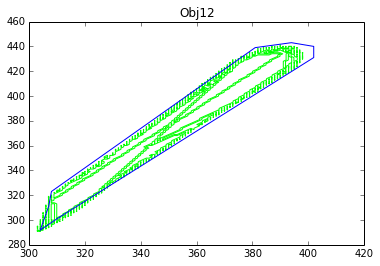

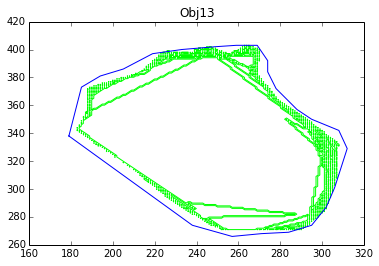

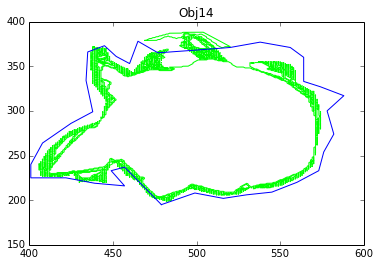

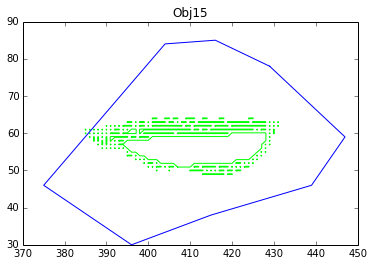

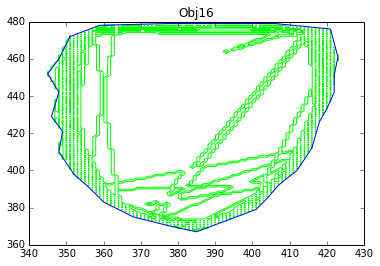

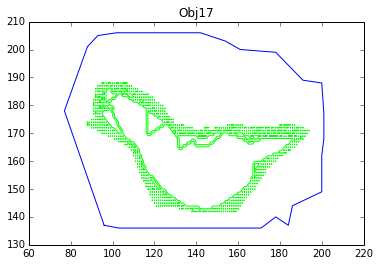

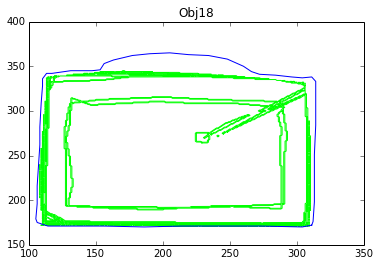

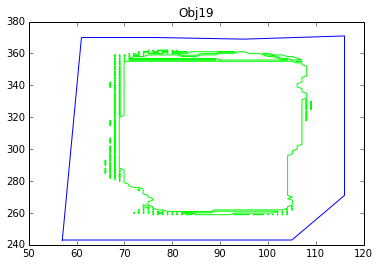

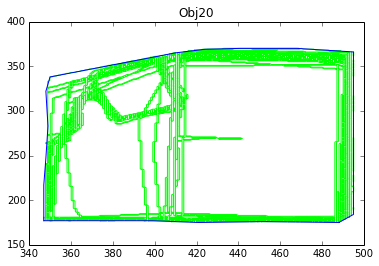

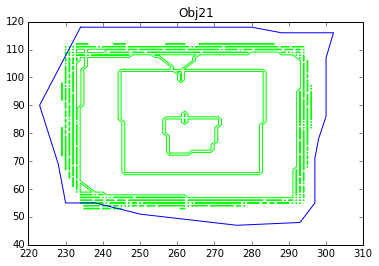

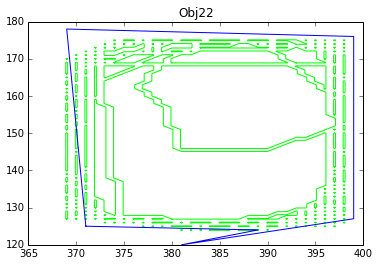

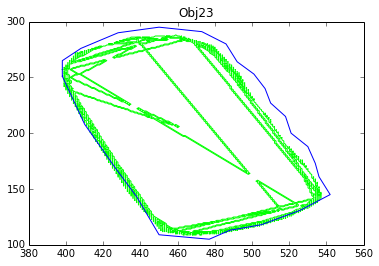

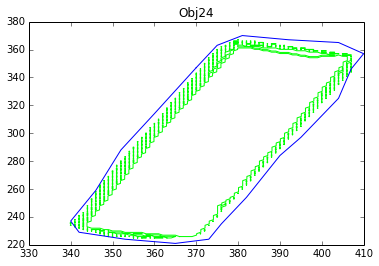

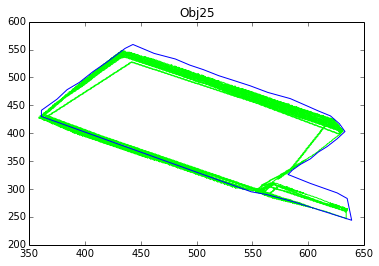

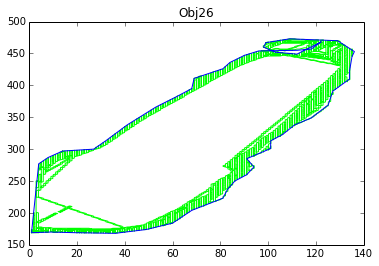

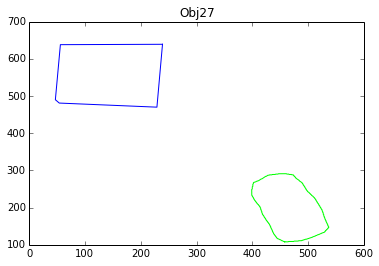

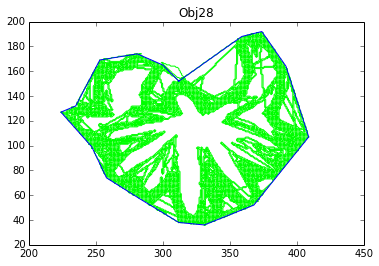

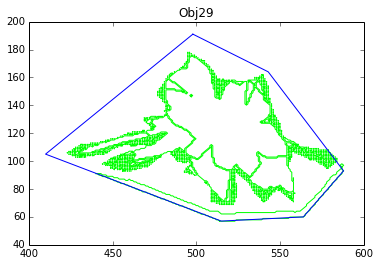

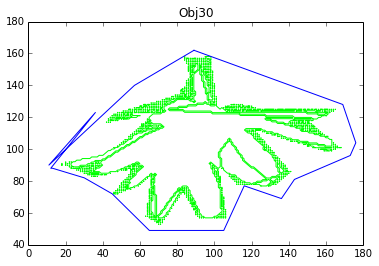

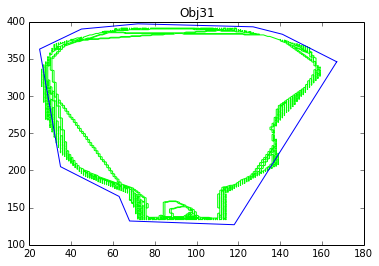

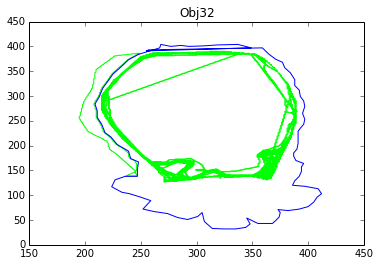

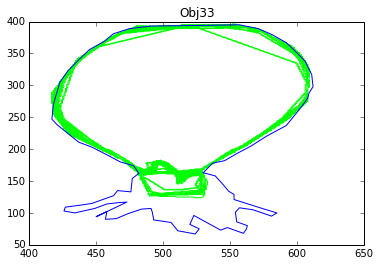

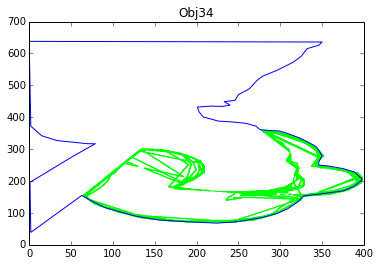

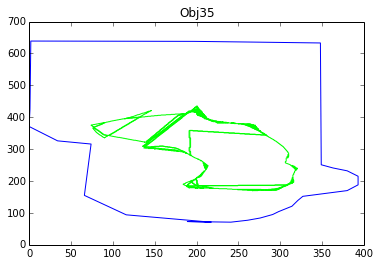

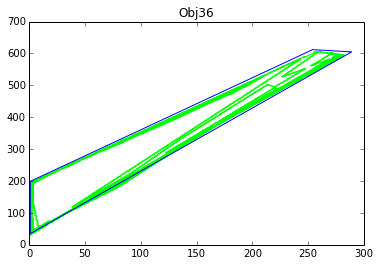

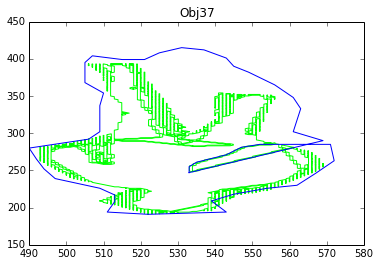

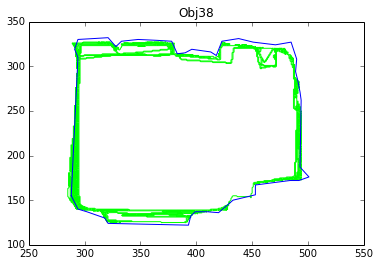

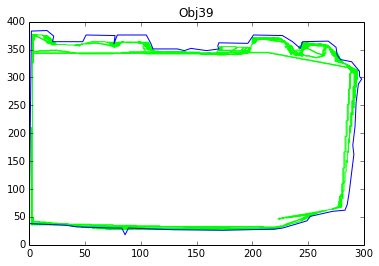

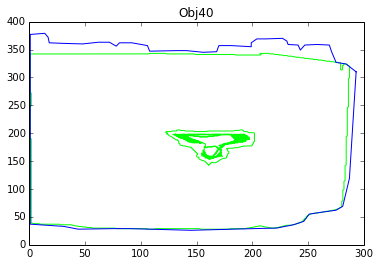

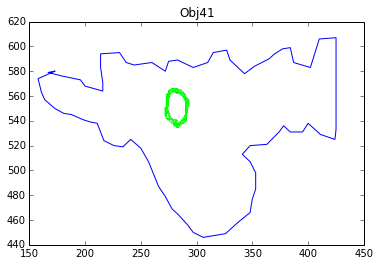

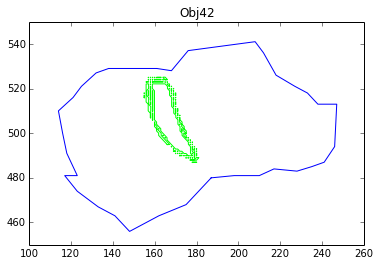

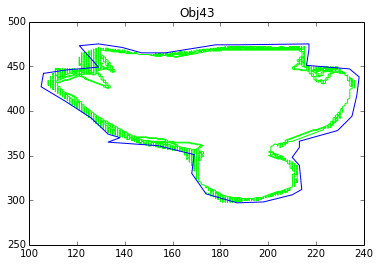

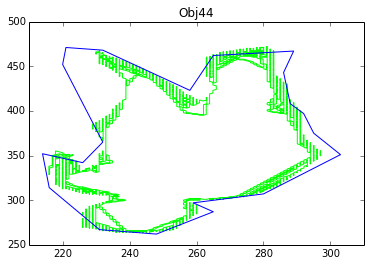

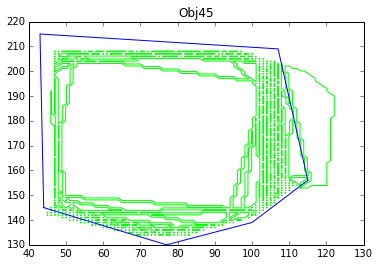

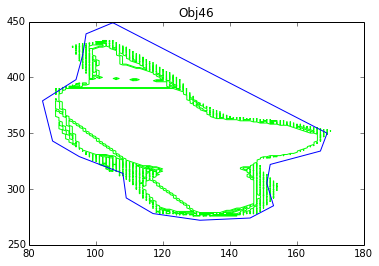

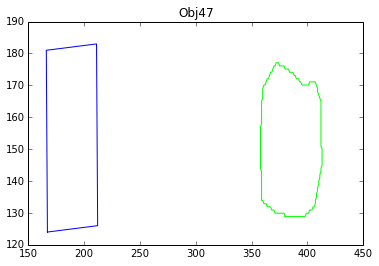

In [18]:
diff_p_lst = []
diff_r_lst = []
for objid in tqdm(object_lst):
    plt.figure()
    plt.title("Obj{}".format(objid))
    diff_p,diff_r=PR_compare(objid)
    diff_p_lst.append(diff_p)
    diff_r_lst.append(diff_r)

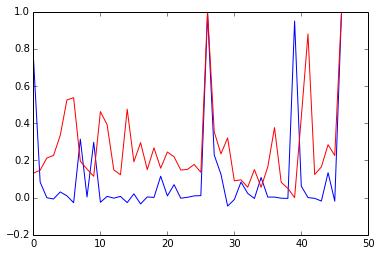

In [19]:
plt.plot(diff_p_lst)
plt.plot(diff_r_lst,color='red')